# Q1

In [8]:
import numpy as np

# 解析 TSP 文件
def parse_tsp(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()
        cities = []
        for line in lines:
            parts = line.split()
            if len(parts) == 3 and parts[0].isdigit():
                cities.append((float(parts[1]), float(parts[2])))
        return cities

# 计算两点间距离
def distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

# 计算路径长度
def path_length(cities, tour):
    total_distance = 0
    for i in range(len(tour)):
        total_distance += distance(cities[tour[i-1]], cities[tour[i]])
    return total_distance

# 2-opt 算法
def two_opt_swap(tour, i, j):
    new_tour = list(tour[:i])
    new_tour.extend(reversed(tour[i:j + 1]))
    new_tour.extend(tour[j + 1:])
    return np.array(new_tour)


# 解析 .opt.tour 文件，以比较最优路径长度
def parse_opt_tour(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()
        opt_tour = []
        for line in lines:
            parts = line.split()
            if parts[0].isdigit():
                opt_tour.append(int(parts[0]) - 1)  # 减1是因为TSP文件通常从1开始编号，而Python列表从0开始
        return opt_tour

# 根据 .opt.tour 文件计算路径长度
def calculate_opt_length(cities, opt_tour):
    total_distance = 0
    for i in range(len(opt_tour)):
        total_distance += distance(cities[opt_tour[i - 1]], cities[opt_tour[i]])
    return total_distance

# 模拟退火算法
def simulated_annealing(cities, initial_temp, final_temp, alpha):
    current_temp = initial_temp
    current_tour = np.random.permutation(len(cities))
    current_length = path_length(cities, current_tour)
    
    while current_temp > final_temp:
        i, j = np.sort(np.random.choice(len(cities), 2, replace=False))
        new_tour = two_opt_swap(current_tour, i, j)
        new_length = path_length(cities, new_tour)
        
        if new_length < current_length or np.random.rand() < np.exp((current_length - new_length) / current_temp):
            current_tour = new_tour
            current_length = new_length
            
        current_temp *= alpha
    
    return current_tour, current_length

# 解析 eli51.tsp 和 eli51.opt.tour 文件
cities = parse_tsp('eil51.tsp.txt')
opt_tour = parse_opt_tour('eil51.opt.tour.txt')
opt_length = calculate_opt_length(cities, opt_tour)



多次运行后找到的最佳路径长度: 432.9410069548507
最优路径长度: 429.983311983384


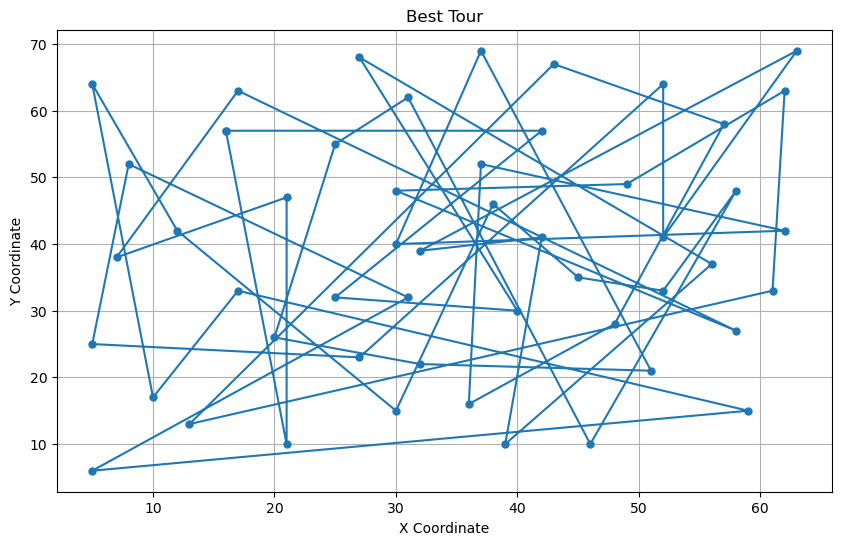

In [10]:

import matplotlib.pyplot as plt

def plot_tour(cities, tour):
    plt.figure(figsize=(10, 6))

    # Adjust for zero indexing if necessary
    adjusted_tour = [city_index - 1 for city_index in tour]

    x = [cities[i][0] for i in adjusted_tour]
    y = [cities[i][1] for i in adjusted_tour]

    # Close the tour by connecting the last city to the first
    x.append(x[0])
    y.append(y[0])

    plt.plot(x, y, 'o-', markersize=5)
    plt.title("Best Tour")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.show()

def multiple_runs_simulated_annealing(cities, runs, initial_temp, final_temp, alpha):
    best_tour = None
    best_length = float('inf')
    
    for _ in range(runs):
        tour, length = simulated_annealing(cities, initial_temp, final_temp, alpha)
        if length < best_length:
            best_length = length
            best_tour = tour
    
    return best_tour, best_length


# 设置参数
runs = 500  # 运行次数
initial_temp = 15000  # 初始温度
final_temp = 0.001    # 最终温度
alpha = 0.999         # 冷却率

# 运行模拟退火算法多次
best_tour, best_length = multiple_runs_simulated_annealing(cities, runs, initial_temp, final_temp, alpha)

print("多次运行后找到的最佳路径长度:", best_length)
#print("模拟退火找到的路径长度:", length)
print("最优路径长度:", opt_length)

# Plotting the best tour found
plot_tour(cities, best_tour)

# Q2

In [32]:
# 指数冷却策略
# # 模拟退火算法
def simulated_annealing(cities, initial_temp, final_temp, alpha):
    current_temp = initial_temp
    current_tour = np.random.permutation(len(cities))
    current_length = path_length(cities, current_tour)
    best_tour = current_tour.copy()
    best_length = current_length

    while current_temp > final_temp:
        for _ in range(len(cities)):  # 在每个温度下执行更多次迭代
            i, j = np.sort(np.random.choice(len(cities), 2, replace=False))
            new_tour = two_opt_swap(current_tour, i, j)
            new_length = path_length(cities, new_tour)

            if new_length < current_length or np.random.rand() < np.exp((current_length - new_length) / current_temp):
                current_tour = new_tour
                current_length = new_length

            if new_length < best_length:
                best_length = new_length
                best_tour = current_tour.copy()

        current_temp *= alpha

    return best_tour, best_length

# 多次运行模拟退火算法
def multiple_runs_simulated_annealing(cities, runs, initial_temp, final_temp, alpha):
    best_tour = None
    best_length = float('inf')
    
    for _ in range(runs):
        tour, length = simulated_annealing(cities, initial_temp, final_temp, alpha)
        if length < best_length:
            best_length = length
            best_tour = tour
    
    return best_tour, best_length

# 解析 TSP 和 OPT 文件
cities = parse_tsp('a280.tsp.txt')  # 替换为 a280.tsp 文件的实际路径
opt_tour = parse_opt_tour('a280.opt.tour.txt')  # 替换为 a280.opt.tour 文件的实际路径
opt_length = calculate_opt_length(cities, opt_tour)

# 设置参数并运行模拟退火算法多次
runs = 15  # 运行次数
initial_temp = 10000  # 初始温度
final_temp = 1        # 最终温度
alpha = 0.997         # 冷却率

best_tour, best_length = multiple_runs_simulated_annealing(cities, runs, initial_temp, final_temp, alpha)

print(f"多次运行后找到的最佳路径长度: {best_length}")
print(f"最优路径长度: {opt_length}")

TypeError: multiple_runs_simulated_annealing() takes 5 positional arguments but 6 were given

Linear Cooling: 7669.9881159600145
Exponential Cooling: 2844.9319303021825
Logarithmic Cooling: 16188.08742891997


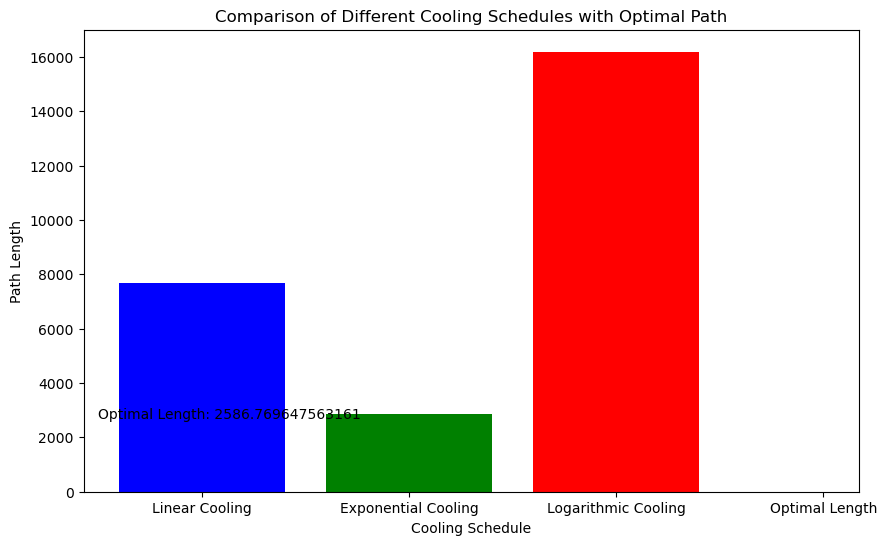

In [33]:
# 不同冷却策略
# 修改模拟退火算法以适应不同的冷却计划
def simulated_annealing(cities, initial_temp, final_temp, alpha, cooling_schedule):
    current_temp = initial_temp
    best_tour = np.random.permutation(len(cities))
    best_length = path_length(cities, best_tour)
    iteration = 1

    while current_temp > final_temp:
        for _ in range(len(cities)):
            i, j = np.sort(np.random.choice(len(cities), 2, replace=False))
            new_tour = two_opt_swap(best_tour, i, j)
            new_length = path_length(cities, new_tour)

            if new_length < best_length or np.random.rand() < np.exp((best_length - new_length) / current_temp):
                best_tour = new_tour
                best_length = new_length

        current_temp = cooling_schedule(current_temp, alpha, iteration)
        iteration += 1

    return best_length

# 不同的冷却计划
def linear_cooling(current_temp, alpha):
    return current_temp - alpha

def exponential_cooling(current_temp, alpha):
    return current_temp * alpha

def logarithmic_cooling(current_temp, alpha, iteration):
    return current_temp / (1 + alpha * np.log(1 + iteration))

# 多次运行模拟退火算法
def multiple_runs_simulated_annealing(cities, runs, initial_temp, final_temp, alpha, cooling_schedule):
    best_length = float('inf')
    
    for _ in range(runs):
        length = simulated_annealing(cities, initial_temp, final_temp, alpha, cooling_schedule)
        if length < best_length:
            best_length = length
    
    return best_length

# 解析 TSP 和 OPT 文件
cities = parse_tsp('a280.tsp.txt')  # 替换为 a280.tsp 文件的实际路径
opt_tour = parse_opt_tour('a280.opt.tour.txt')  # 替换为 a280.opt.tour 文件的实际路径
opt_length = calculate_opt_length(cities, opt_tour)

# 设置参数并运行模拟退火算法多次
runs = 15  # 运行次数
initial_temp = 10000  # 初始温度
final_temp = 1        # 最终温度
alpha = 0.997         # 冷却率

# 运行模拟退火算法并比较不同冷却计划
cooling_strategies = {
    "Linear Cooling": lambda temp, alpha, _: linear_cooling(temp, alpha),
    "Exponential Cooling": lambda temp, alpha, _: exponential_cooling(temp, alpha),
    "Logarithmic Cooling": logarithmic_cooling
}

results = {}
for name, strategy in cooling_strategies.items():
    best_length = multiple_runs_simulated_annealing(cities, runs, initial_temp, final_temp, alpha, strategy)
    results[name] = best_length
    print(f"{name}: {best_length}")

# 可视化结果
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.plot(['Optimal Length'] * 2, [opt_length, opt_length], color='black', linestyle='--')
plt.text(-0.5, opt_length, f'Optimal Length: {opt_length}', verticalalignment='bottom')
plt.xlabel('Cooling Schedule')
plt.ylabel('Path Length')
plt.title('Comparison of Different Cooling Schedules with Optimal Path')
plt.show()

Linear Cooling: 7891.886441141149
Exponential Cooling: 2919.6369362721434
Logarithmic Cooling: 15956.692700335363


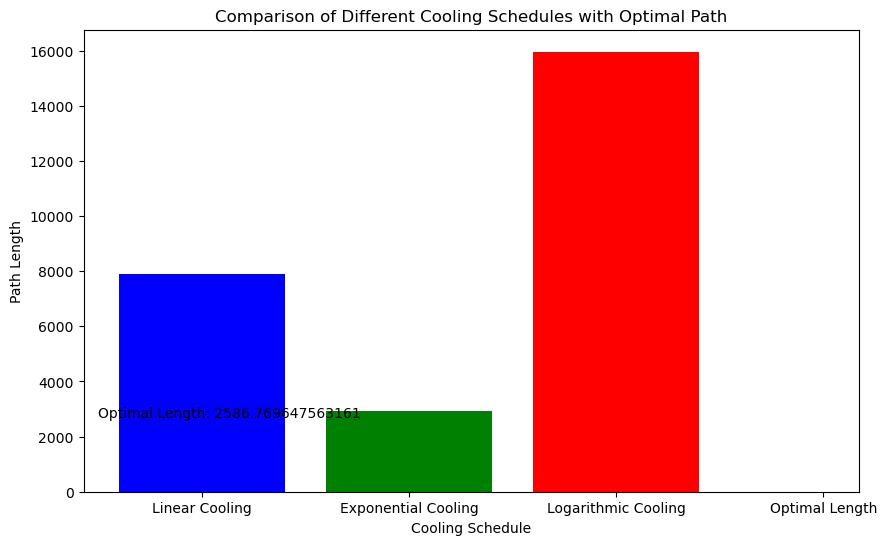

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 不同冷却策略
# 修改模拟退火算法以适应不同的冷却计划
def simulated_annealing(cities, initial_temp, final_temp, alpha, cooling_schedule):
    current_temp = initial_temp
    best_tour = np.random.permutation(len(cities))
    best_length = path_length(cities, best_tour)
    iteration = 1

    while current_temp > final_temp:
        for _ in range(len(cities)):
            i, j = np.sort(np.random.choice(len(cities), 2, replace=False))
            new_tour = two_opt_swap(best_tour, i, j)
            new_length = path_length(cities, new_tour)

            if new_length < best_length or np.random.rand() < np.exp((best_length - new_length) / current_temp):
                best_tour = new_tour
                best_length = new_length

        current_temp = cooling_schedule(current_temp, alpha, iteration)
        iteration += 1

    return best_length

# 不同的冷却计划
def linear_cooling(current_temp, alpha):
    return current_temp - alpha

def exponential_cooling(current_temp, alpha):
    return current_temp * alpha

def logarithmic_cooling(current_temp, alpha, iteration):
    return current_temp / (1 + alpha * np.log(1 + iteration))

# 多次运行模拟退火算法
def multiple_runs_simulated_annealing(cities, runs, initial_temp, final_temp, alpha, cooling_schedule):
    best_length = float('inf')
    
    for _ in range(runs):
        length = simulated_annealing(cities, initial_temp, final_temp, alpha, cooling_schedule)
        if length < best_length:
            best_length = length
    
    return best_length

# 解析 TSP 和 OPT 文件
cities = parse_tsp('a280.tsp.txt')  # 替换为 a280.tsp 文件的实际路径
opt_tour = parse_opt_tour('a280.opt.tour.txt')  # 替换为 a280.opt.tour 文件的实际路径
opt_length = calculate_opt_length(cities, opt_tour)

# 设置参数并运行模拟退火算法多次
runs = 3  # 运行次数
initial_temp = 10000  # 初始温度
final_temp = 1        # 最终温度
alpha = 0.997         # 冷却率

# 运行模拟退火算法并比较不同冷却计划
cooling_strategies = {
    "Linear Cooling": lambda temp, alpha, _: linear_cooling(temp, alpha),
    "Exponential Cooling": lambda temp, alpha, _: exponential_cooling(temp, alpha),
    "Logarithmic Cooling": logarithmic_cooling
}

results = {}
for name, strategy in cooling_strategies.items():
    best_length = multiple_runs_simulated_annealing(cities, runs, initial_temp, final_temp, alpha, strategy)
    results[name] = best_length
    print(f"{name}: {best_length}")

# 可视化结果
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.plot(['Optimal Length'] * 2, [opt_length, opt_length], color='black', linestyle='--')
plt.text(-0.5, opt_length, f'Optimal Length: {opt_length}', verticalalignment='bottom')
plt.xlabel('Cooling Schedule')
plt.ylabel('Path Length')
plt.title('Comparison of Different Cooling Schedules with Optimal Path')
plt.show()

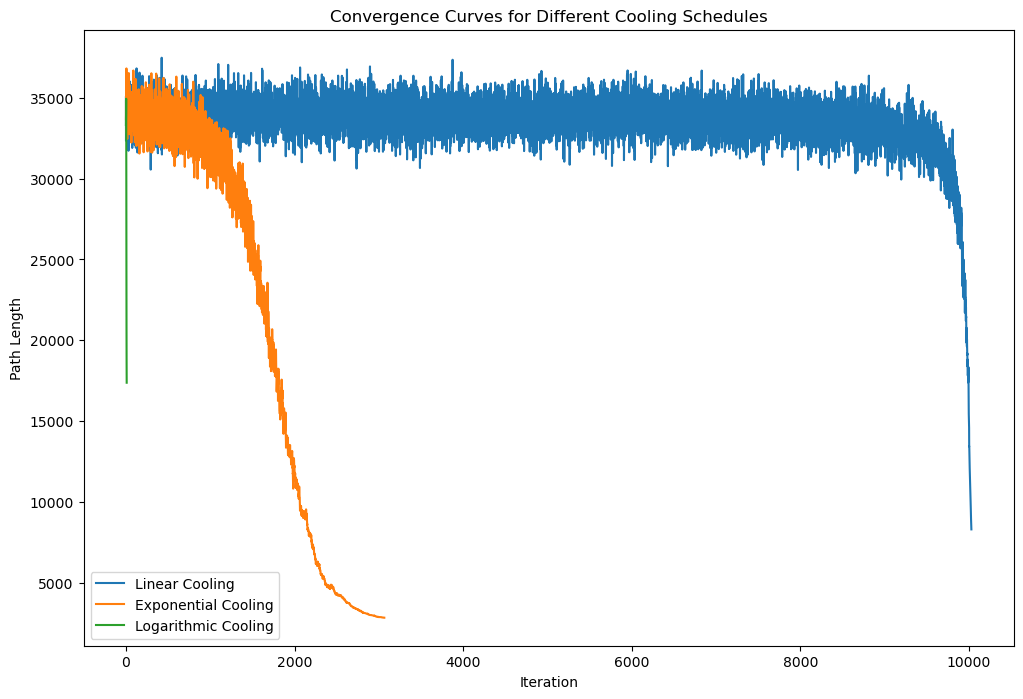

TypeError: list indices must be integers or slices, not tuple

<Figure size 1000x1000 with 0 Axes>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 不同冷却策略
# 修改模拟退火算法以适应不同的冷却计划
def simulated_annealing(cities, initial_temp, final_temp, alpha, cooling_schedule):
    current_temp = initial_temp
    best_tour = np.random.permutation(len(cities))
    best_length = path_length(cities, best_tour)
    iteration = 1
    path_lengths = []
    
    while current_temp > final_temp:
        for _ in range(len(cities)):
            i, j = np.sort(np.random.choice(len(cities), 2, replace=False))
            new_tour = two_opt_swap(best_tour, i, j)
            new_length = path_length(cities, new_tour)

            if new_length < best_length or np.random.rand() < np.exp((best_length - new_length) / current_temp):
                best_tour = new_tour
                best_length = new_length

        current_temp = cooling_schedule(current_temp, alpha, iteration)
        iteration += 1
        path_lengths.append(best_length)

    return best_tour, path_lengths

# 不同的冷却计划
def linear_cooling(current_temp, alpha):
    return current_temp - alpha

def exponential_cooling(current_temp, alpha):
    return current_temp * alpha

def logarithmic_cooling(current_temp, alpha, iteration):
    return current_temp / (1 + alpha * np.log(1 + iteration))

# 多次运行模拟退火算法
def multiple_runs_simulated_annealing(cities, runs, initial_temp, final_temp, alpha, cooling_schedule):
    best_length = float('inf')
    
    for _ in range(runs):
        length = simulated_annealing(cities, initial_temp, final_temp, alpha, cooling_schedule)
        if length < best_length:
            best_length = length
    
    return best_length

# 解析 TSP 和 OPT 文件
cities = parse_tsp('a280.tsp.txt')  # 替换为 a280.tsp 文件的实际路径
opt_tour = parse_opt_tour('a280.opt.tour.txt')  # 替换为 a280.opt.tour 文件的实际路径
opt_length = calculate_opt_length(cities, opt_tour)

# 设置参数并运行模拟退火算法多次
runs = 3  # 运行次数
initial_temp = 10000  # 初始温度
final_temp = 1        # 最终温度
alpha = 0.997         # 冷却率

# 运行模拟退火算法并比较不同冷却计划
cooling_strategies = {
    "Linear Cooling": lambda temp, alpha, _: linear_cooling(temp, alpha),
    "Exponential Cooling": lambda temp, alpha, _: exponential_cooling(temp, alpha),
    "Logarithmic Cooling": logarithmic_cooling
}

# Prepare to run simulated annealing with different cooling schedules and plot results
results = {}
plt.figure(figsize=(12, 8))

for schedule_name, cooling_schedule in cooling_strategies.items():
    best_tour, path_lengths = simulated_annealing(cities, initial_temp, final_temp, alpha, cooling_schedule)
    results[schedule_name] = (best_tour, path_lengths)
    plt.plot(path_lengths, label=schedule_name)

plt.xlabel('Iteration')
plt.ylabel('Path Length')
plt.title('Convergence Curves for Different Cooling Schedules')
plt.legend()
plt.show()
